## QKD BB84

In [1]:
from components import Network, Controller
from components.qkd.bb84 import create_key, generate_bases, prepara_qubits_bb84, aplly_bases_in_measurement_bb84, compare_bases, get_key

In [2]:
# Criando uma rede:
rede = Network()
# Definindo a topologia
rows = 3
cols = 4
rede.set_lattice_topology(rows, cols)

# Definindo um controlador
controlador = Controller()
controlador.set_network(rede)

# Informações adicionais
num_mensagens = 10
key_size = 100
diff_nodes = 3

In [3]:
# Main code
for messages in range(num_mensagens):
    # Definindo Alice e Bob
    alice, bob = rede.random_alice_bob(diff_nodes)
    
    # Informações para Alice
    msg = "Opa"
    key_alice = create_key(key_size)
    bases_alice = generate_bases(key_size)
    
    # Qubits
    qubits = prepara_qubits_bb84(key_alice, bases_alice)
    
    # Informações para Bob
    bases_bob = generate_bases(key_size)
    
    # Calculando a rota
    route = controlador.calculate_route(alice, bob)

    # Bob recebendo a chave
    received_qubits = rede.send_qubits(route, qubits)
    
    # Bob mede os qubits
    measured_qubits = aplly_bases_in_measurement_bb84(received_qubits, bases_bob)
    
    # Comparando as bases de Alice e Bob
    matching_bases = compare_bases(bases_alice, bases_bob)
    
    # Chave obtida de acordo com as bases
    generated_shared_key = get_key(measured_qubits, matching_bases)
    
    # Print the results
    results = f"""
Key gerada:      {key_alice}
Shared Key:      {generated_shared_key}
Bases Alice:     {bases_alice}
Bases Bob:       {bases_bob}
Bits diferentes: {len(key_alice) - len(generated_shared_key)}
"""
    print(results)


Key gerada:      [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]
Shared Key:      [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0]
Bases Alice:     [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]
Bases Bob:       [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 

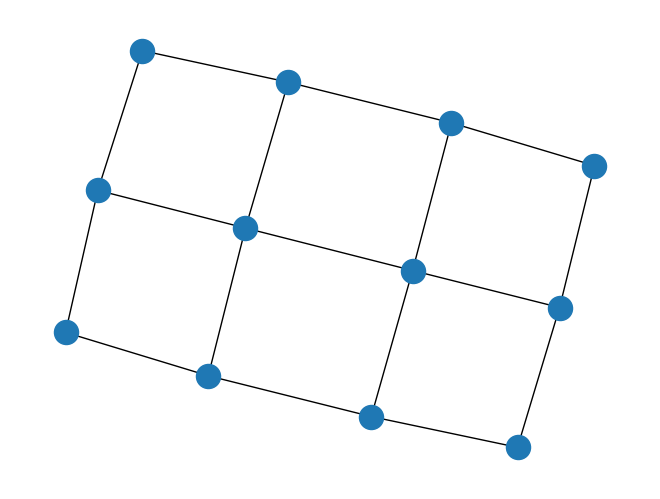

In [4]:
rede.draw()